# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 提出问题

1. 收费和免费软件的评分的平均值分别是多少？
2. 收费软件的价格分布情况？
3. 哪些 App 的下载比较多？
4. 下载比较多的app类型？

## 数据评估和清理

In [1]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
# load pacakges
import pandas as pd
import numpy as np

In [3]:
# load the dataset
data_df = pd.read_csv('googleplaystore.csv')
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###  数据评估

In [4]:
data_df.shape

(10841, 13)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data_df.duplicated().sum()

483

In [8]:
data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
data_df[['Category','Genres']].sample(10)

,Category,Genres
7605,FAMILY,Arcade;Action & Adventure
7553,TOOLS,Tools
5320,TRAVEL_AND_LOCAL,Travel & Local
1181,FOOD_AND_DRINK,Food & Drink
7867,MEDICAL,Medical
4723,FAMILY,Role Playing
3530,PRODUCTIVITY,Productivity
4616,FAMILY,Puzzle
9536,FAMILY,Entertainment
7021,BEAUTY,Beauty


#### 需要处理的内容：
+ 'Price'类型应该改为float类型。
+ 'Installs','Reviews'类型应该改为int类型。
+ 'Type','Category'应该改为分类类型。
+ 'Category'与'Genres',选择后者，因为后者更详细
+ 'Current Ver','Android Ver','Size','Category', 'Last Updated','Content Rating'这些列不需要。
+ 将列名中的多个字母用'_'进行连接。

+ 存在重复的记录，
+ 'Rating','Type','Content Rating','Current Ver','Android Ver'列存在Null值，需要处理。
+ 查看数值类型的列的分布，判断是否存在**outliers**,'Rating'存在异常值

### 数据清理

#### 创建数据副本

In [10]:
data_df = data_df.copy()

#### 清理列名

In [11]:
def clean_columns(df,drop_list):
    '''
    description：
        first of all,to make the columns to call by the accessor easiliy;
        secondly,drop unnecessary columns.
    input:
        df: Dataframe.
        drop_list:list,the list consists of columns to drop.
    return:
        df: Dataframe.
    '''
    initial_column_len = len(df.columns)
    df.drop(drop_list,axis=1,inplace=True)
    df.rename(columns=lambda x:x.lower().strip().replace(' ','_'),inplace=True)
    
    # 输出操作结果
    print(f'{drop_list}have been dropped successfully')
    print(f'the result of proceding is {len(df.columns)+len(drop_list)==initial_column_len}')

In [12]:
drop_list = ['Current Ver','Android Ver','Last Updated','Size','Category','Content Rating']
clean_columns(data_df,drop_list)

['Current Ver', 'Android Ver', 'Last Updated', 'Size', 'Category', 'Content Rating']have been dropped successfully
the result of proceding is True


#### 清理空值

In [13]:
data_df.dropna(axis= 0, inplace= True)
data_df.isna().sum()

app         0
rating      0
reviews     0
installs    0
type        0
price       0
genres      0
dtype: int64

#### 清理数据类型

**注意**
+ 首先清理空值，然后再进行数据类型的转换

In [14]:
data_df.price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', 'Everyone', '$1.20'], dtype=object)

In [15]:
data_df.type.unique()

array(['Free', 'Paid', '0'], dtype=object)

In [16]:
data_df.installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+', 'Free'], dtype=object)

In [17]:
data_df.reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

+ 'data_df.reviews.astype(int)'会出现如下错误"ValueError: invalid literal for int() with base 10: '3.0M'"

In [18]:
data_df.query("reviews == '3.0M'")

,app,rating,reviews,installs,type,price,genres
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,3.0M,Free,0,Everyone,"February 11, 2018"


In [19]:
data_df.query("type == '0'")

,app,rating,reviews,installs,type,price,genres
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,3.0M,Free,0,Everyone,"February 11, 2018"


In [20]:
data_df.query("installs =='Free'")

,app,rating,reviews,installs,type,price,genres
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,3.0M,Free,0,Everyone,"February 11, 2018"


In [21]:
data_df.query("price == 'Everyone'")

,app,rating,reviews,installs,type,price,genres
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,3.0M,Free,0,Everyone,"February 11, 2018"


In [22]:
# 上述四个查询，发现index为10472的记录是异常记录，需要进行删除处理。
data_df.drop(index=10472,inplace=True)

In [23]:
# 将'type'和'installs'两个列的数据的类型改为分类类型
data_df.type =data_df.type.astype('category')
data_df.installs = pd.Categorical(data_df.installs)
# 将'reviews'中的elements的类型转换为int类型。
data_df.reviews = data_df.reviews.astype(int)

+ 'price'列中的元素，是由数字和字符组成，需要用正则表达式，将数值提取出来，并转换为float类型。
+ data_df.price = data_df.price.str.extract(r'.*?(\d+[.]\d+)').astype(float),这个操作会导致数值为0的记录，都会转化为NAN
+ 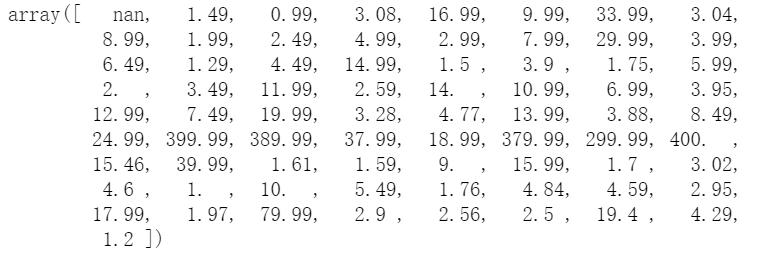


In [24]:
data_df.price = data_df.price.str.extract(r'(\d+\.?\d*)').astype(float)

In [25]:
data_df.price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [26]:
data_df.price.describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: price, dtype: float64

+ 'price'中元素不是连续值，而是离散值，可以考虑将数据类型改为分类类型。

In [27]:
data_df.price = pd.Categorical(data_df.price)

In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
app         9366 non-null object
rating      9366 non-null float64
reviews     9366 non-null int32
installs    9366 non-null category
type        9366 non-null category
price       9366 non-null category
genres      9366 non-null object
dtypes: category(3), float64(1), int32(1), object(2)
memory usage: 360.7+ KB


In [29]:
# 处理'genres',是否需要展开？
# data_df.genres.unique()

#### 清理重复值

In [30]:
data_df.duplicated(subset='app',keep=False).sum()

1959

In [31]:
data_df.drop_duplicates(inplace =True)
data_df.duplicated(subset='app',keep=False).sum()

1203

+ 没有完全清除重复值，因为'data_df.drop_duplicates(inplace =True)'只能清理各个字段都重复的记录，但是对于'app'名称重复，但是'reviews'不同的记录不能清除，因此需要添加参数，进行更详细的清除。

In [32]:
data_df[data_df.duplicated(subset='app',keep=False)].sort_values('app',axis=0,ascending=True).head(10)

,app,rating,reviews,installs,type,price,genres
3083,365Scores - Live Scores,4.6,666521,"10,000,000+",Free,0.0,Sports
5415,365Scores - Live Scores,4.6,666246,"10,000,000+",Free,0.0,Sports
1755,8 Ball Pool,4.5,14200344,"100,000,000+",Free,0.0,Sports
1844,8 Ball Pool,4.5,14200550,"100,000,000+",Free,0.0,Sports
1871,8 Ball Pool,4.5,14201891,"100,000,000+",Free,0.0,Sports
3953,8 Ball Pool,4.5,14184910,"100,000,000+",Free,0.0,Sports
1675,8 Ball Pool,4.5,14198297,"100,000,000+",Free,0.0,Sports
1970,8 Ball Pool,4.5,14201604,"100,000,000+",Free,0.0,Sports
1703,8 Ball Pool,4.5,14198602,"100,000,000+",Free,0.0,Sports
559,95Live -SG#1 Live Streaming App,4.1,4953,"1,000,000+",Free,0.0,Dating


+ 保留每个'app'中'review'最大的记录
+ 首先需要对'app'和'review'进行排序
+ 然后清除重复值

In [33]:
data_df.sort_values(['app','reviews'],axis=0,ascending=True,inplace=True)
data_df.drop_duplicates(subset='app',keep='first',inplace=True)
data_df.duplicated(subset='app',keep='first').sum()

0

#### 清理异常值

+ 查看数值分布的情况。 

In [34]:
data_df.describe()

,rating,reviews
count,8196.000000,8.196000e+03
mean,4.173194,2.550775e+05
std,0.536640,1.984894e+06
min,1.000000,1.000000e+00
25%,4.000000,1.260000e+02
50%,4.300000,2.986000e+03
75%,4.500000,4.361175e+04
max,5.000000,7.812821e+07


#### 重置index

In [35]:
data_df.reset_index(drop=True,inplace=True)

#### Presistence

In [36]:
data_df.to_csv("google_play_store_phase_clean.csv")

## 数据探索分析

In [53]:
# In exploratory data analysis, please make sure of using statistics and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [54]:
df = pd.read_csv("google_play_store_phase_clean.csv",header=0,index_col=0)
df.head()

,app,rating,reviews,installs,type,price,genres
0,+Download 4 Instagram Twitter,4.5,40467,"1,000,000+",Free,0.0,Social
1,- Free Comics - Comic Apps,3.5,115,"10,000+",Free,0.0,Comics
2,.R,4.5,259,"10,000+",Free,0.0,Tools
3,/u/app,4.7,573,"10,000+",Free,0.0,Communication
4,058.ba,4.4,27,100+,Free,0.0,News & Magazines


+ 参数'index_col'的作用
+ 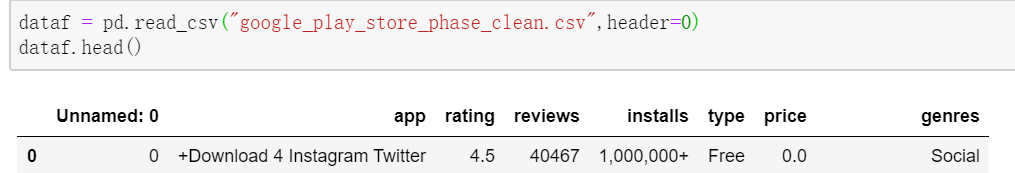

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD6500D5C0>,
      dtype=object)

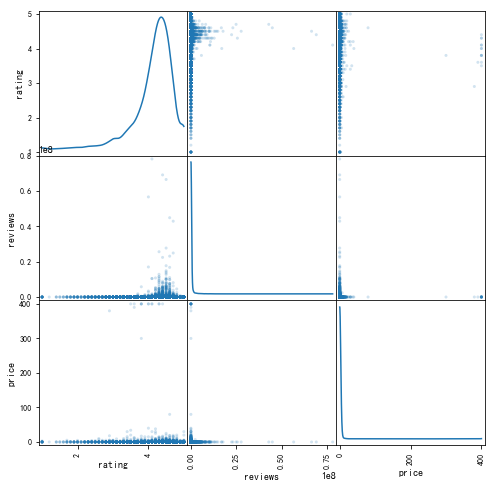

In [69]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde')

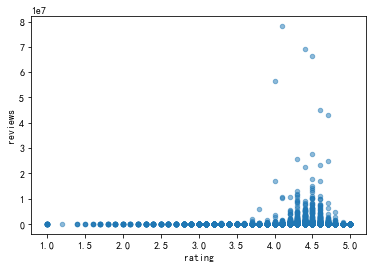

In [68]:
df.plot(kind='scatter',x='rating',y='reviews',alpha =0.5,figsize=(6,4))

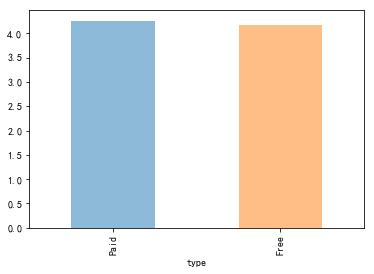

In [70]:
type_rating_mean = df.groupby('type')['rating'].mean().sort_values(ascending=False)
type_rating_mean.plot.bar(alpha=0.5)

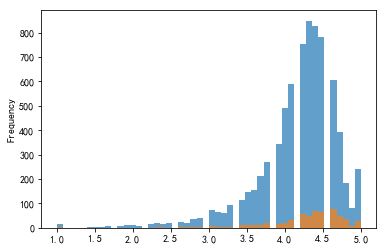

In [89]:
df.groupby('type')['rating'].plot.hist(bins=50,alpha =0.7);

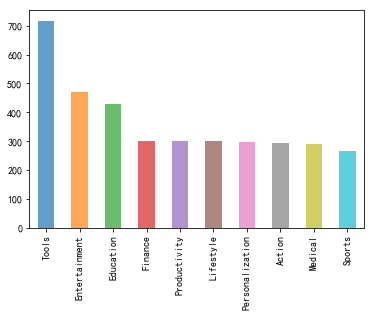

In [90]:
df.genres.value_counts().nlargest(10).plot(kind='bar',alpha=0.7)

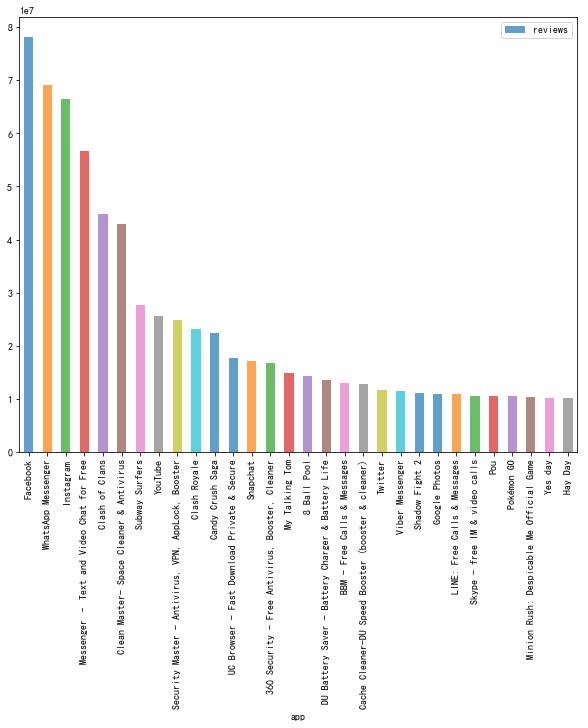

In [101]:
df.sort_values('reviews',ascending=False)[:30].plot(kind='bar',x='app',y='reviews',alpha=0.7,figsize=(10,8))

## 得出结论

**问题:**
1. 收费和免费软件的评分的平均值分别是多少？


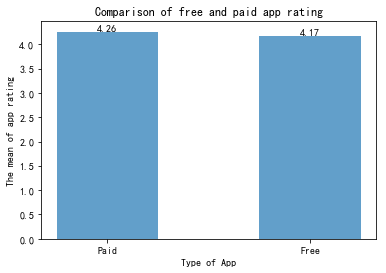

In [139]:
type_rating_mean = df.groupby('type')['rating'].mean().sort_values(ascending=False)
x = type_rating_mean.index
y = type_rating_mean.values
plt.bar(x,y,width=0.5,alpha=0.7)
plt.xlabel('Type of App')
plt.ylabel('The mean of app rating')
plt.title('Comparison of free and paid app rating')
for a,b in zip(x,y):
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)
plt.show()

**结论1**
1. 收费软件的平均评分为4.26分；
2. 免费软件的平均评分为4.17分；
3. 收费软件的平均评分高于免费软件的平均评分。

**问题:**
2. 收费软件的价格分布情况？


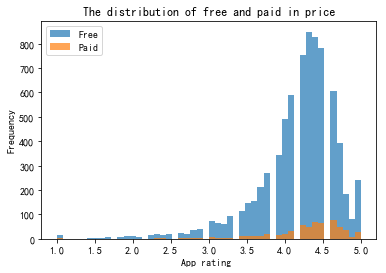

In [138]:
df.groupby('type')['rating'].plot.hist(bins=50,alpha =0.7)
plt.xlabel("App rating ")
plt.ylabel("Frequency")
plt.title('The distribution of free and paid in price')
plt.legend()
plt.show()

**结论2**
1. 免费软件的数量多于付费软件
2. 免费软件的平均评分低于付费软件的平均评分
3. 付费软件的评分分布相比免费软件，更靠近右侧。

**问题**：
3. 哪些 App 的下载比较多？


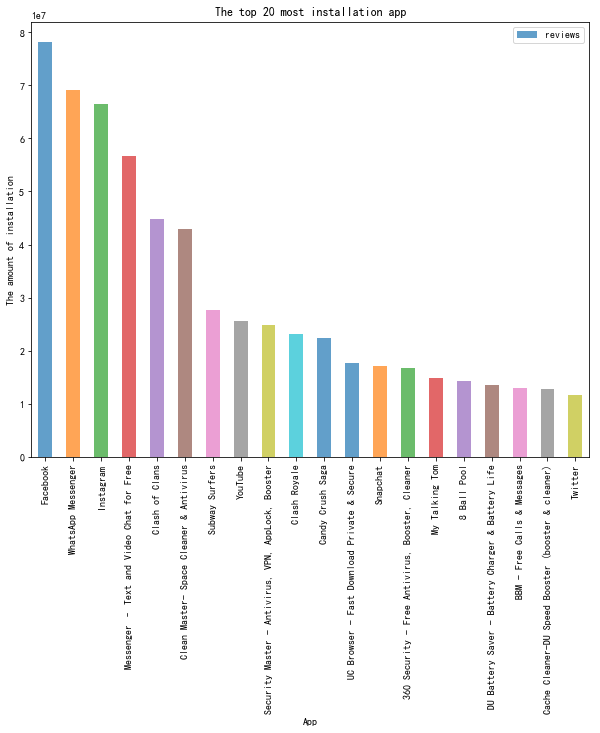

In [136]:
df.sort_values('reviews',ascending=False)[:20].plot(kind='bar',x='app',y='reviews',alpha=0.7,figsize=(10,8))
plt.title('The top 20 most installation app')
plt.xlabel('App')
plt.ylabel('The amount of installation')
plt.show()

**结论3**
1. Facebook下载量最大。
2. 下载量前四位均为社交类软件
3. 下载量前20的软件中，安全类软件，系统清理，电池管理类软件相比游戏类软件更多

**问题：**
4. 下载比较多的app类型？

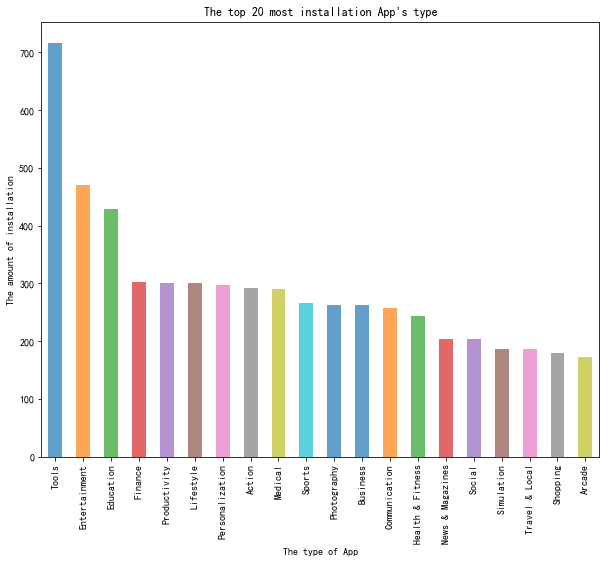

In [135]:
df.genres.value_counts().nlargest(20).plot(kind='bar',alpha=0.7,figsize=(10,8))
plt.title("The top 20 most installation App's type")
plt.xlabel("The type of App")
plt.ylabel("The amount of installation")
plt.show()

**结论4**
1. 工具类的软件下载量最多。
2. 位居下载量前五名的软件类型分别是工具类，娱乐类，教育类，金融类和生产力类
3. 工具类软件的下载量几乎是娱乐类软件的一倍。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
1. 完整与否取决于提出的问题，如果要分析预测软件评分，或者下载量，那么现有数据集的特征不足。
2. 有可能。是否影响结论，也与操作处理的记录相比数据集总记录数的比例有关。
3. 增加软件更新的频率，软件适用的频率，每用户下载量等特征应该有助于进一步的分析。
4. 没有。